In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv


Actual column names:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

Cleaned column names:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

✅ Using 'Yield' as the target column.
R² Score: 0.9944025986874337
RMSE: 4659.631005061921


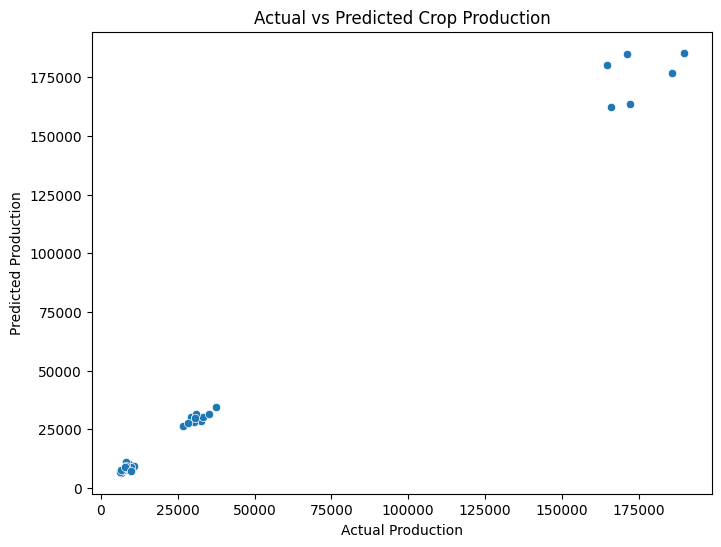

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv')

# Print actual column names
print("Actual column names:")
print(df.columns.tolist())

# Clean column names (remove leading/trailing whitespace)
df.columns = df.columns.str.strip()

# Print cleaned column names
print("\nCleaned column names:")
print(df.columns.tolist())

# Let’s assume the correct target column is the one with the name closest to 'Production'
# You can adjust this if needed
potential_targets = ['Production', 'production', 'Yield', 'yield']
target_col = None

for col in df.columns:
    if col.strip() in potential_targets:
        target_col = col
        break

# If still not found, show all column names and raise an error
if target_col is None:
    raise ValueError("Target column not found. Please check the column names listed above.")

print(f"\n✅ Using '{target_col}' as the target column.")

# Drop missing values
df = df.dropna()

# Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Production")
plt.show()

Original columns in dataset:
- Crop
- Precipitation (mm day-1)
- Specific Humidity at 2 Meters (g/kg)
- Relative Humidity at 2 Meters (%)
- Temperature at 2 Meters (C)
- Yield

✅ Target column selected: Yield
Model R² Score: 0.981
Model RMSE: 9300.35


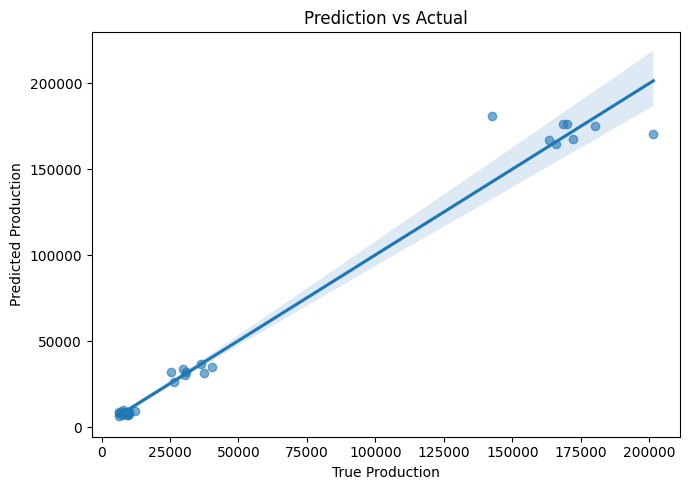

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv('/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv')

# Show columns
print("Original columns in dataset:")
for col in data.columns:
    print(f"- {col}")

# Clean column names
data.columns = [col.strip() for col in data.columns]

# Detect possible target column
target_candidates = ['Production', 'production', 'Yield', 'yield']
target = next((col for col in data.columns if col in target_candidates), None)

if target is None:
    raise Exception("Target column not identified. Please verify column names.")

print(f"\n✅ Target column selected: {target}")

# Drop nulls
clean_data = data.dropna()

# Encode non-numeric data
encoders = {}
for col in clean_data.select_dtypes(include='object'):
    encoder = LabelEncoder()
    clean_data[col] = encoder.fit_transform(clean_data[col])
    encoders[col] = encoder

# Prepare feature matrix and target vector
features = clean_data.drop(columns=target)
labels = clean_data[target]

# Train-test split
train_X, test_X, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=0)

# Model
regressor = RandomForestRegressor(n_estimators=120, random_state=0)
regressor.fit(train_X, train_y)

# Prediction and evaluation
predicted_y = regressor.predict(test_X)

r2 = r2_score(test_y, predicted_y)
rmse = mean_squared_error(test_y, predicted_y, squared=False)

print(f"Model R² Score: {r2:.3f}")
print(f"Model RMSE: {rmse:.2f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(7, 5))
sns.regplot(x=test_y, y=predicted_y, scatter_kws={'alpha':0.6})
plt.xlabel("True Production")
plt.ylabel("Predicted Production")
plt.title("Prediction vs Actual")
plt.tight_layout()
plt.show()

Dataset Columns:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

Target variable set to: 'Yield'

Evaluation Metrics:
MAE  : 5287.58
RMSE : 10090.83
R²   : 0.9804


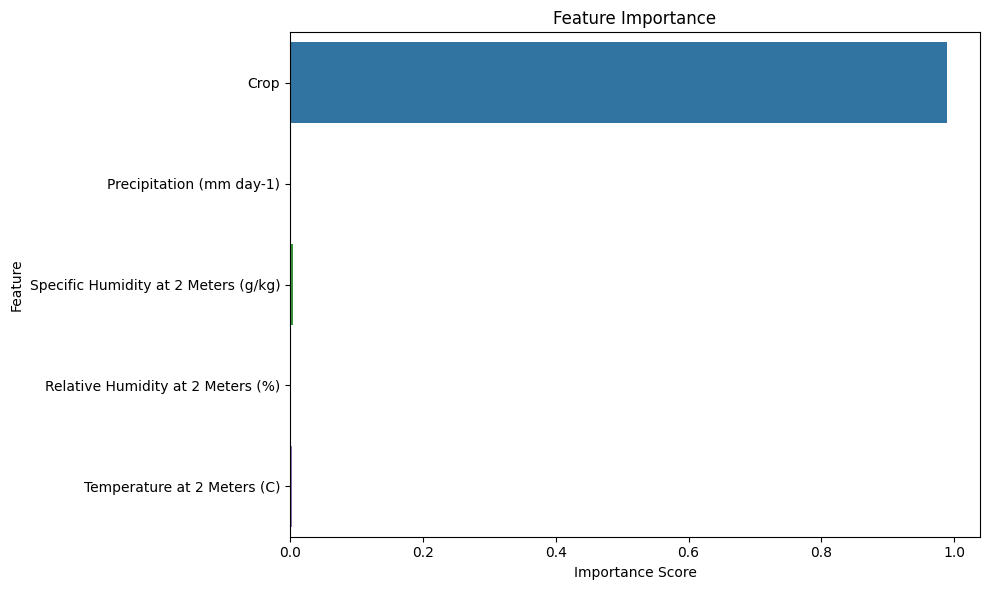

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Read CSV
df = pd.read_csv('/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv')

# Normalize column headers (remove spaces)
df.columns = df.columns.str.strip()

# Show column headers
print("Dataset Columns:")
print(df.columns.to_list())

# Attempt to identify target column
target = None
for col in df.columns:
    if col.lower().strip() in ['production', 'yield']:
        target = col
        break

if not target:
    raise ValueError("Target column (e.g., 'Production' or 'Yield') not found in the dataset.")

print(f"\nTarget variable set to: '{target}'")

# Drop null values
df = df.dropna()

# Encode categorical columns
categoricals = df.select_dtypes(include='object').columns
for column in categoricals:
    df[column] = LabelEncoder().fit_transform(df[column])

# Features & labels
X = df.drop(columns=target)
y = df[target]

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Model training
forest = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=1)
forest.fit(X_train, y_train)

# Predictions
results = forest.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, results)
rmse = mean_squared_error(y_test, results, squared=False)
r2 = r2_score(y_test, results)

print(f"\nEvaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

# Feature Importance Visualization
importance = forest.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Available Columns:
 ['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

Target selected: Yield


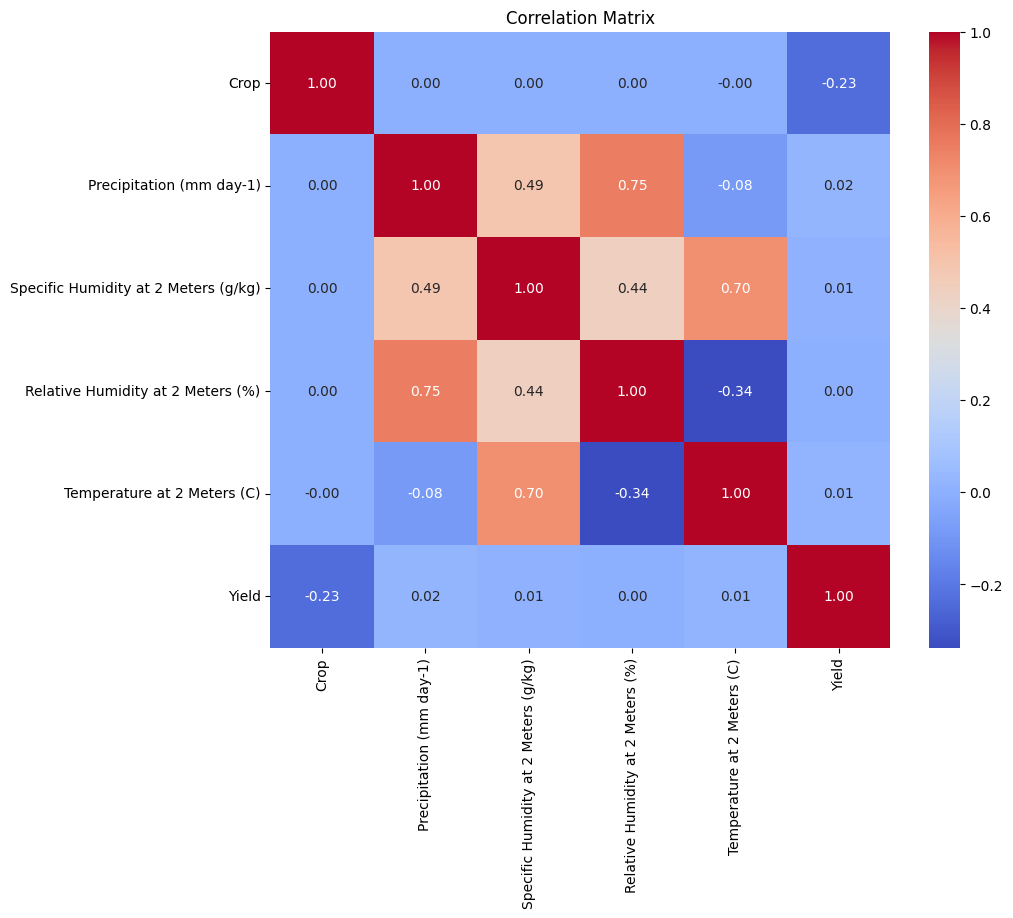


Model Evaluation:
Mean Squared Error: 77122566.05
Mean Absolute Error: 4571.74
R-squared Score: 0.9828

Top 10 Highest Errors:
    Actual      Predicted         Error
44  202379  167555.225000  34823.775000
17  201436  170109.975000  31326.025000
15  189896  166866.950000  23029.050000
16  152343  172068.850000  19725.850000
24  165262  176214.850000  10952.850000
31   25251   33955.775000   8704.775000
18  168476  176012.491667   7536.491667
36  180323  173866.258333   6456.741667
9   172165  166203.541667   5961.458333
5    29855   35348.833333   5493.833333


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
file_path = '/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = [col.strip() for col in data.columns]

# Print column list
print("Available Columns:\n", data.columns.tolist())

# Infer target column
possible_targets = ['Production', 'production', 'Yield', 'yield']
target_column = [col for col in data.columns if col in possible_targets]

if not target_column:
    raise Exception("Target variable not found in dataset.")
else:
    target_column = target_column[0]
    print(f"\nTarget selected: {target_column}")

# Drop missing values
data = data.dropna()

# Convert object columns to numeric using label encoding
label_cols = data.select_dtypes(include='object').columns
for col in label_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Heatmap of feature correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Define features and label
features = data.drop(columns=[target_column])
labels = data[target_column]

# Split the dataset
train_X, test_X, train_y, test_y = train_test_split(features, labels, test_size=0.3, random_state=100)

# Train RandomForest model
model = RandomForestRegressor(n_estimators=120, random_state=100)
model.fit(train_X, train_y)

# Make predictions
preds = model.predict(test_X)

# Evaluation
mse = mean_squared_error(test_y, preds)
mae = mean_absolute_error(test_y, preds)
r2 = r2_score(test_y, preds)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Create dataframe to compare actual and predicted
comparison = pd.DataFrame({
    'Actual': test_y.values,
    'Predicted': preds,
    'Error': np.abs(test_y.values - preds)
})

# Sort by highest errors
print("\nTop 10 Highest Errors:")
print(comparison.sort_values(by='Error', ascending=False).head(10))

Original column names:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

Cleaned column names:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

✅ Using 'Yield' as the target column.
R² Score: 0.9939
RMSE: 4881.96


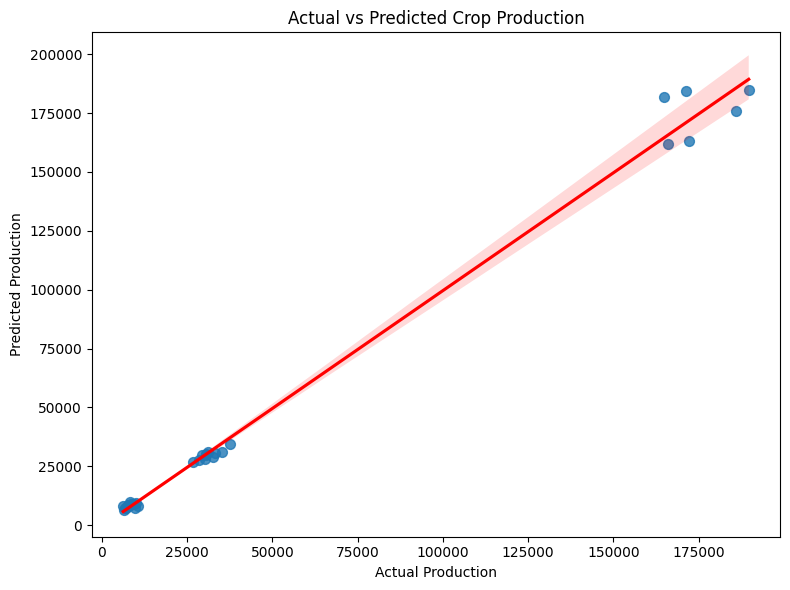

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv')

# Display original column names for clarity
print("Original column names:")
print(df.columns.tolist())

# Clean column names by removing leading/trailing whitespaces
df.columns = df.columns.str.strip()

# Display cleaned column names
print("\nCleaned column names:")
print(df.columns.tolist())

# Identify the target column dynamically based on potential names
target_col = next((col for col in df.columns if col.strip().lower() in ['production', 'yield']), None)

if not target_col:
    raise ValueError("Target column not found. Please check the dataset.")

print(f"\n✅ Using '{target_col}' as the target column.")

# Drop rows with missing values
df.dropna(inplace=True)

# Separate categorical columns and encode them using OneHotEncoder
categorical_cols = df.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse

for col in categorical_cols:
    encoded = encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{i}" for i in range(encoded.shape[1])])
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(col, axis=1, inplace=True)

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Visualization of Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Production")
plt.tight_layout()
plt.show()